inicio codigo
usdchfd1
               Open     High      Low    Close     Vol   Rango  percambio   cum7  cum20  cum60  cumyear           tipovol        rect               union        tiporango     tipovela                 operativa
Date                                                                                                                                                                                                             
2017-09-15  0.96285  0.96460  0.95638  0.95930  122160   822.0  -0.418341  1.625 -0.547 -0.950   -5.728       Vol > media  zona libre   AT100res,MED50res              neg         nada                         N
2017-09-18  0.96011  0.96398  0.95791  0.96166  106728   607.0   0.246013  0.566  0.019 -1.025   -5.482                 N  zona libre   AT100res,MED50sop        insidebar         nada                    compra
2017-09-19  0.96095  0.96478  0.95940  0.96241  115647   538.0   0.077990  0.263 -0.575  0.298   -5.404                 N  zona libre   A

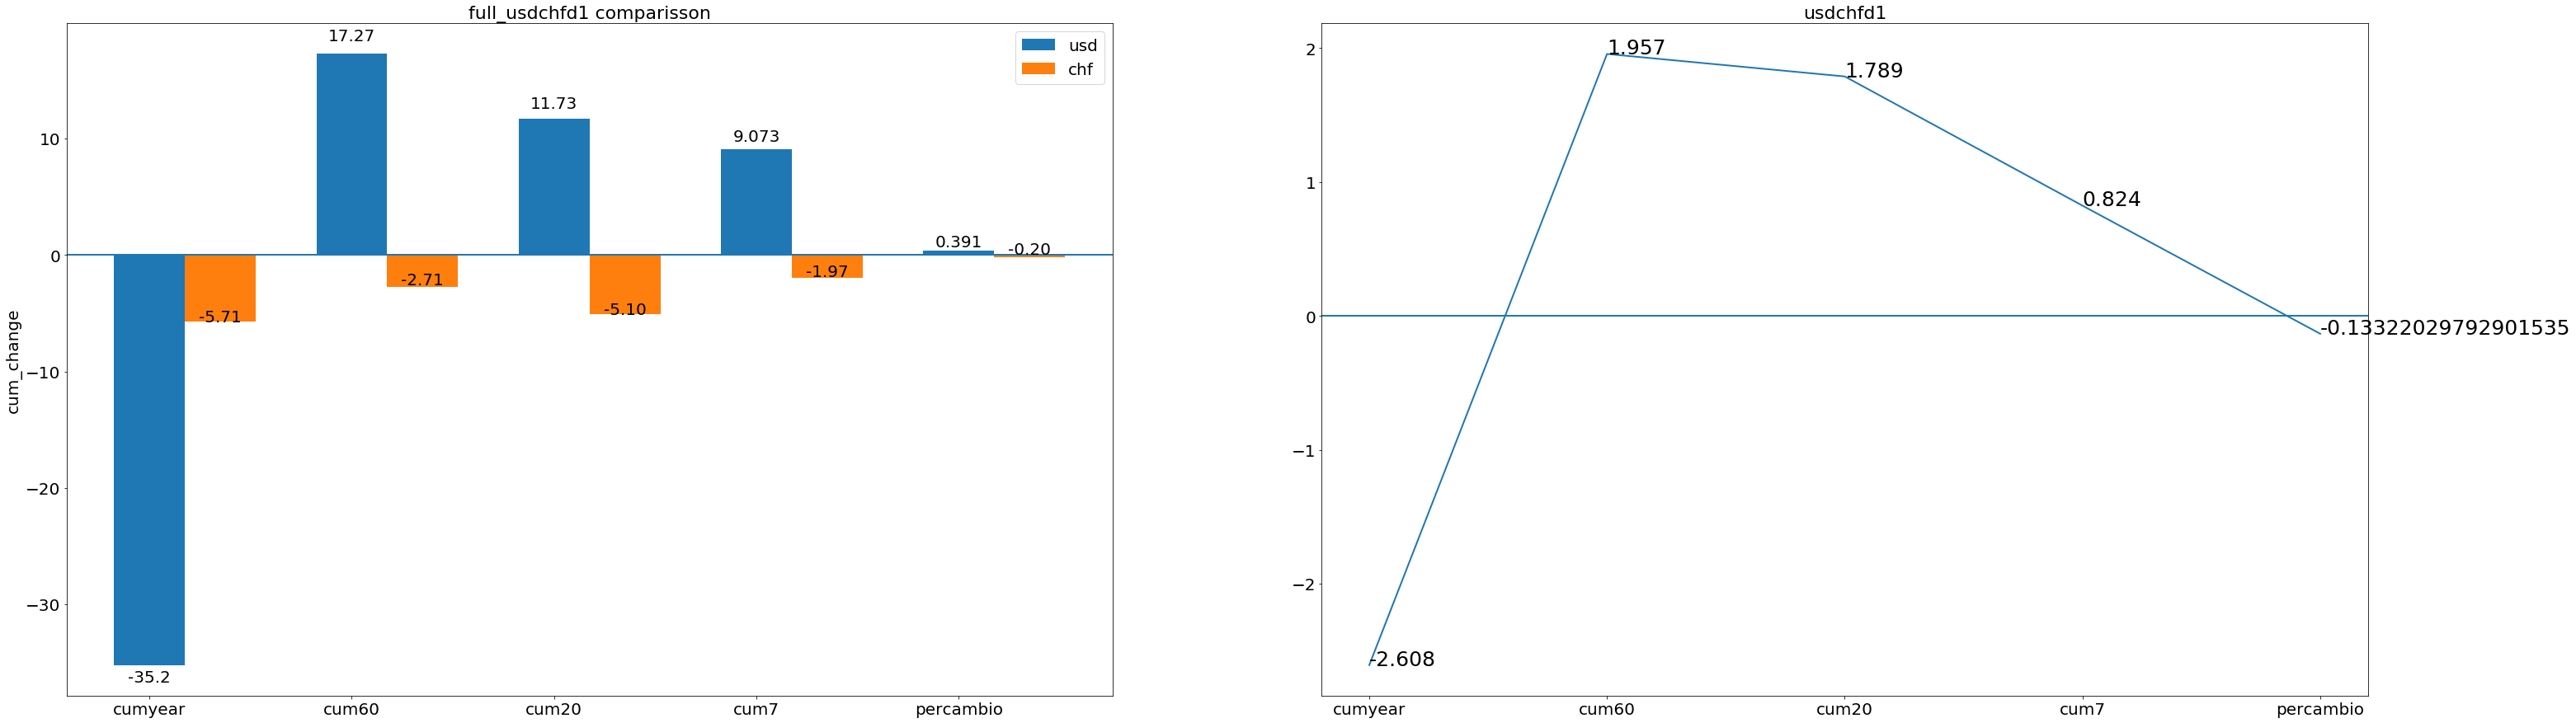

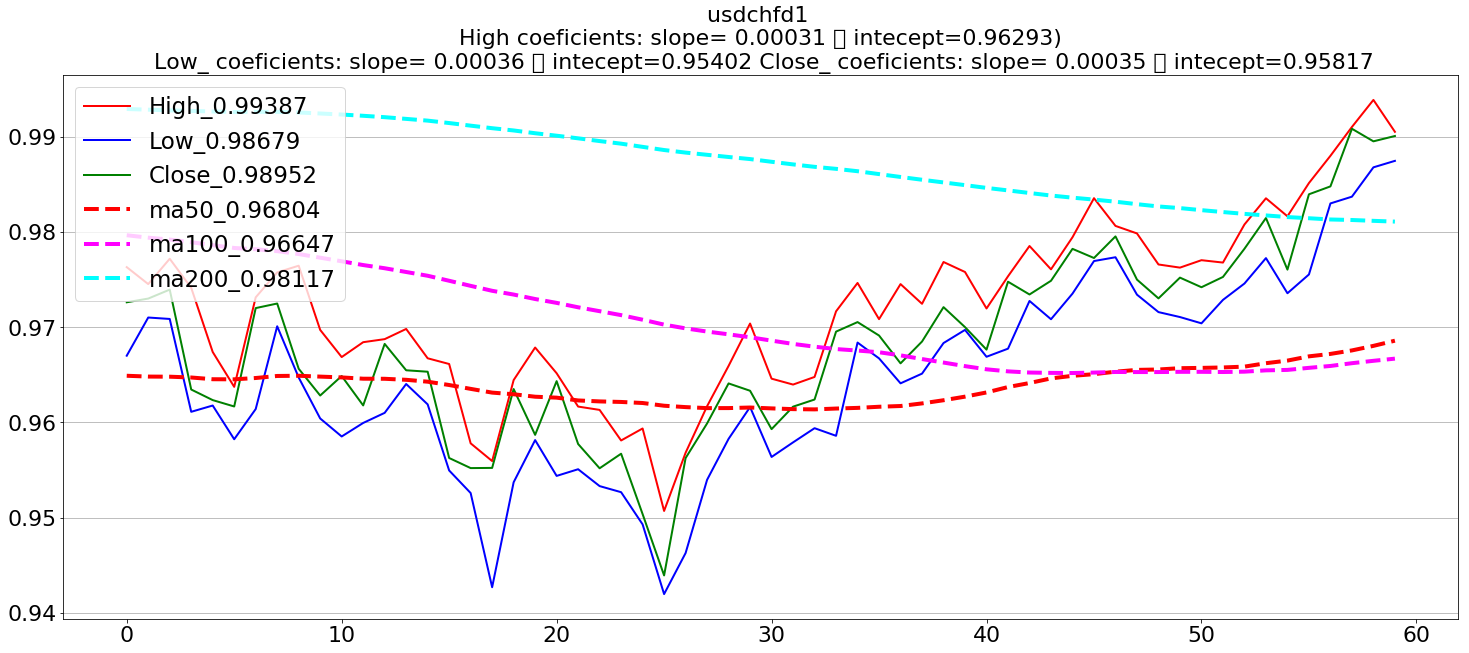

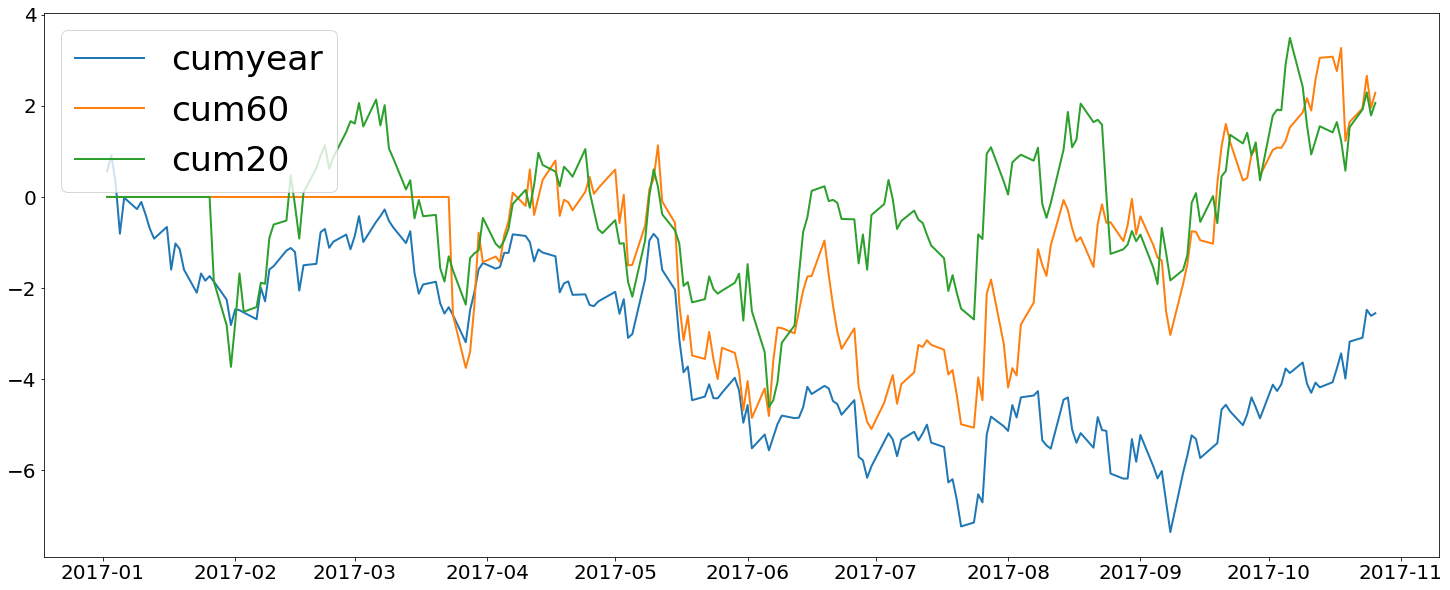

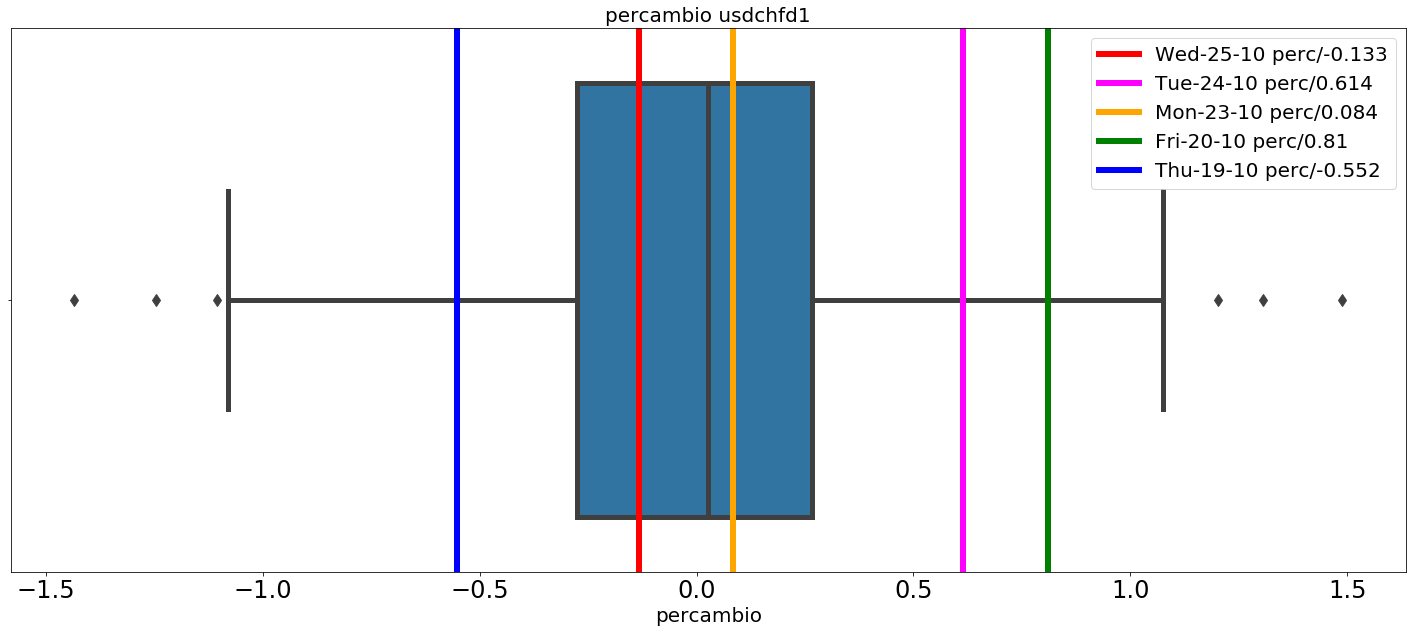

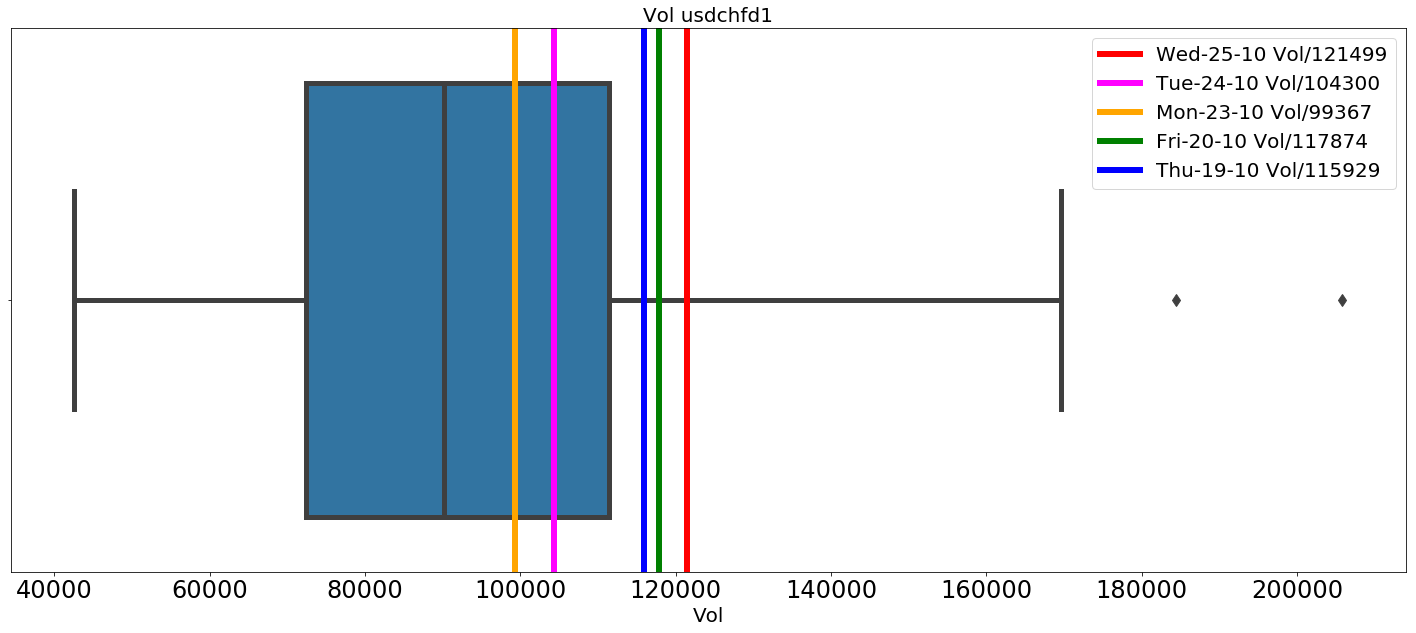

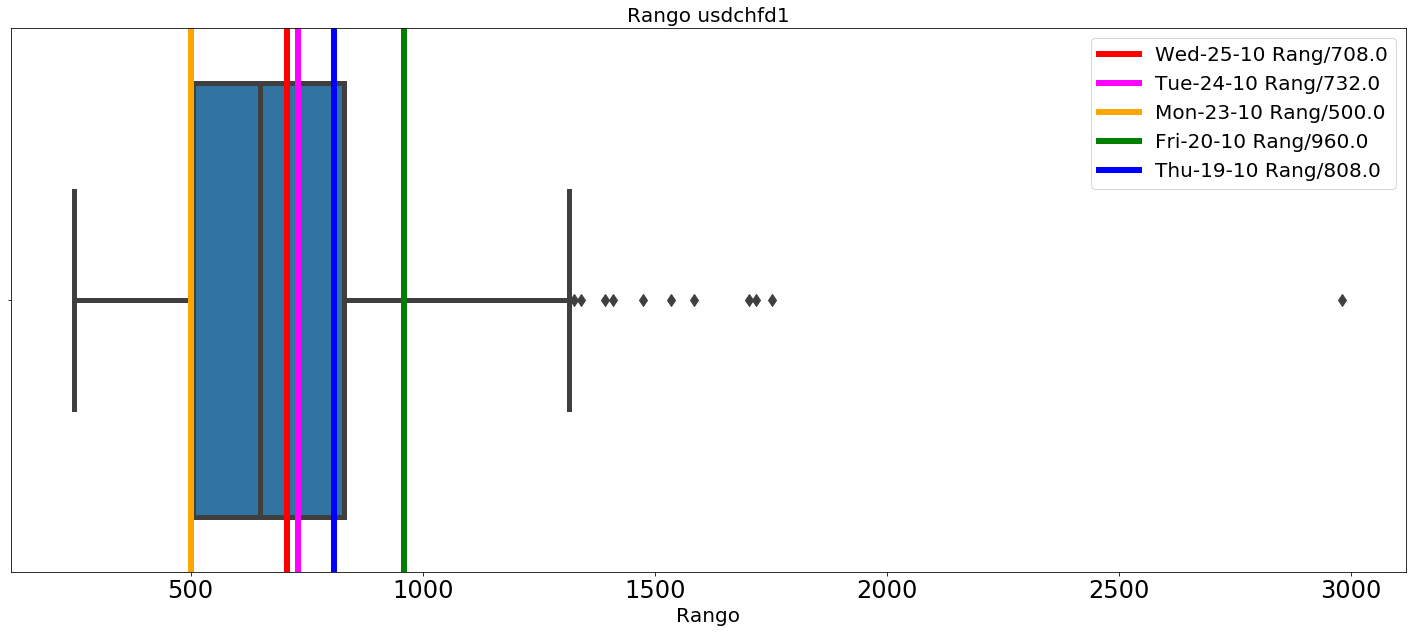

codigo ejecutado


In [3]:
import pickle
import os
import pandas as pd
import numpy as np
import formulas_media_seg as med_seg
from functools import reduce
import sopres_rectangulo_new as sopre

from formulas_daily import rutasdiccio,Tablas2,Analisisdiscreto,full_divisas,diccio_currency
import formulas_daily as form_d

import copy
import datetime
import matplotlib.pyplot as plt

from decimal import *
import decimal
from decimal import Decimal
import seaborn as sns
import datetime
tdelta1=datetime.timedelta(days=1)
tdelta5=datetime.timedelta(days=5)
hoynostr=datetime.date.today()
ayer=str(hoynostr-tdelta1)

plt.rcParams['axes.labelsize']=20
plt.rcParams['font.size']=20
plt.rcParams['xtick.labelsize']=20
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['legend.fontsize']=20
plt.rcParams['lines.linewidth']=2.0
plt.rcParams[ 'axes.titlesize']=22.0

#pickle.dump(listaprueba,open('listaprueba.tkl','wb'))
print('inicio codigo')
exec(open('C:/Users/jaime/MitoProyect/Trading/Variables/Daily/sopres_rectangulo_new.py').read())
rangofechas=np.arange(hoynostr-tdelta5,hoynostr)
rangofechas=rangofechas[np.is_busday(rangofechas)]
x=np.array([5,6])
if hoynostr.weekday() in x :
        hoy=str(rangofechas[-1])
        ayer=str(rangofechas[-2])
else:
        hoy=str(datetime.date.today())
        ayer=str(rangofechas[-1])

full_activos,rutasdict,dic_route_indices,claves,claves_indices,claves_divisas=rutasdiccio()

dic_route=pickle.load(open('dic_route_indices.tkl','rb'))

#dic_full=pickle.load(open('objetos/dic_full.tkl','rb'))

dicciosoportes=sopre.creacion_rectangulos()

divisas_rect=list(dicciosoportes.keys())

rutasdict.keys()


Dfunpack=[Tablas2(value,divisas_rect) for value in rutasdict.values()]
Dfunpack=[value[(value.Rango.values>0)]for value in Dfunpack]   
Dfunpack=[Analisisdiscreto(value) for value in Dfunpack]
Dfindices=[Tablas2(value,divisas_rect) for value in dic_route_indices.values()]
Dfindices=[Analisisdiscreto(value) for value in Dfindices]

#claves2=[value[:-2].upper()+'d1' for value in claves]

rutasdict.keys()

(BUNDM7d1,USTNOTEM7d1,AUDCADd1,AUDNZDd1,AUDUSDd1,BRENTd1,CHFJPYd1,EURAUDd1,EURCADd1,
EURCHFd1,EURGBPd1,EURJPYd1,EURNZDd1,EURUSDd1,GBPAUDd1,GBPJPYd1,GBPUSDd1,GOLDd1,
EURXd1,USDXd1,NZDJPYd1,NZDUSDd1,SILVERd1,USDCADd1,USDCHFd1,USDJPYd1,USDRUBd1,WTId1)=Dfunpack
 
#AUDCADd1
Dfunpack=(BUNDM7d1,USTNOTEM7d1,AUDCADd1,AUDNZDd1,AUDUSDd1,BRENTd1,CHFJPYd1,EURAUDd1,EURCADd1,
          EURCHFd1,EURGBPd1,EURJPYd1,EURNZDd1,EURUSDd1,GBPAUDd1,GBPJPYd1,GBPUSDd1,GOLDd1,
          EURXd1,USDXd1,NZDJPYd1,NZDUSDd1,SILVERd1,USDCADd1,USDCHFd1,USDJPYd1,USDRUBd1,WTId1)

GOLDd1=GOLDd1[['Open', 'High', 'Low', 'Close','Vol', 'rango', 'percambio','cum7', 'cum20','cum60' , 'cumyear', 'tipovol','rect','tiporango',  'tipovela','operativa']]
listacolumnasd1=['Open', 'High', 'Low', 'Close','Vol','Rango','percambio','cum7', 'cum20','cum60' , 'cumyear', 'tipovol','rect','union','tiporango',  'tipovela','operativa']

def columns_dict(diccio):
    for key,value in diccio.items():
        if key == 'goldd1':
            diccio[key]=diccio[key][listacolumnasd1]
    #        print(dicDivisasd1[key])
        else:
             diccio[key]=diccio[key][listacolumnasd1]
    #         print(dicDivisasd1[key])
    return(diccio)

dicDivisasd1=dict(zip(claves,Dfunpack))
dic_full_cols=dict(zip(claves,Dfunpack))
dicd1=dicDivisasd1
dic_indices=dict(zip(claves_indices,Dfindices))
dic_full=copy.deepcopy(dicDivisasd1)
dic_full_cols.update(dic_indices)

dic_full.update(dic_indices)
claves_full=list(dic_full.keys())
dicDivisasd1= columns_dict(dicDivisasd1)  
dic_indices= columns_dict(dic_indices)  
dic_full=columns_dict(dic_full)
dic_currency,claves_currency=diccio_currency(dicDivisasd1)
claves_indices=list(dic_indices.keys())
claves_indices=claves_indices+['bundz7d1', 'ustnotez7d1','goldd1','silverd1']

clavesquitar=['bundz7d1','ustnotez7d1','brentd1','goldd1', 'eurxd1', 'usdxd1', 'silverd1','usdrubd1', 'wtid1']
clavesdivisas= [divisa for divisa in claves if divisa not in clavesquitar]   #utilizada para visionar el diccionario quitando las clavesquitar
dicd1res=copy.deepcopy(dicDivisasd1)
for clave in clavesquitar:
    dicd1res.pop(clave)

  
#%matplotlib inline
plt.rcParams['figure.figsize'] = (25.0, 10.0)


dic_cum=form_d.dic_full_divisas(dic_full)

pickle.dump(claves_indices,open('objetos/claves_indices.tkl','wb'))
pickle.dump(dic_full,open('objetos/dic_full.tkl','wb'))


form_d.visiondicdivisas(dic_full,dic_full_cols,dicDivisasd1,['usdchfd1','eurusdd1','gbpusdd1'])
print('codigo ejecutado')
